In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'png'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvcnRicy9jb2RlL3RoZXNpcy9kaXNzZXJ0YXRpb24vY29udGVudC9jb2RlZmlncw=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/home/rtbs/code/thesis/dissertation/.pixi/envs/default/lib/python3.12/importlib/_bootstrap.py": 1744325139.0, "/home/rtbs/code/thesis/dissertation/.pixi/envs/default/lib/python3.12/importlib/_bootstrap_external.py": 1744325139.0, "/home/rtbs/code/thesis/dissertation/.pixi/envs/default/lib/python3.12/zipimport.py": 1744325138.0, "/home/rtbs/code/thesis/dissertation/.pixi/envs/default/lib/python3.12/codecs.py": 1744325138.0, "/home/rtbs/code/thesis/dissertation/.pixi/envs/default/lib/python3.12/encodings/aliases.py": 1744325138.0, "/home/rtbs/code/thesis/dissertation/.pixi/envs/default/lib/python3.12/encodings/__init__.py": 1744325138.0, "/home/rtbs/code/thesis/dissertation/.pixi/envs/default/lib/python3.12/encodings/utf_8.py": 1744325138.0, "/home/rtbs/code/thesis/dissertation/.pixi/envs/default/lib/python3.12/abc.py": 1744325138.0, "/home/rtbs/code/thesis/dissertation/.pixi/envs/default/lib/python3.12/io.py": 1744325138.0, "/home/rtbs/code/thesis/dissertation/.pixi/envs/default/lib/p

In [2]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.core.display import HTML, display_svg, Latex, Markdown
import networkx as nx
# import netgraph as ng
from network2tikz import plot
from jupyter_tikz import TexFragment, TexDocument
from numpyarray_to_latex import to_ltx as np2tex
import pandas as pd

matplotlib.rcParams['font.family']=['serif']
matplotlib.rcParams['font.serif']=['Bitstream Charter']

%config InlineBackend.figure_formats = ['svg']
# %load_ext jupyter_tikz
# fm = matplotlib.font_manager
# sorted(fm.get_font_names())

In [3]:
figsize = matplotlib.rcParams['figure.figsize']

In [4]:
# preamble = r"""
# \usepackage{tikz}
# \usepackage{tikz-network}
# """

import os
tex = os.getenv('QUARTO_PDFLATEX')

In [5]:
# DEFAULT STYLES
my_orange=(231., 195., 138.)  # "#e7c38a"
my_green =(141., 203., 160.)  # "#8dcba0"
my_red   =(252.,  98., 142.)  # "#fc628e"
my_blue  =(171., 215., 230.)  # "#abd7e6"
my_grey = (200,200,200)

nxdraw_kws = {
    #"node_size": 500, 
    # "node_color": "xkcd:slate",
    # "edge_color": "0.4",
    # "edgecolors": "white",
    "edgecolors": "0.4",
    # "font_color": "white",
    "font_color": "0.3",
    "font_family":"Bitstream Charter",
    "font_weight":'bold',
    "font_size": 8,
    "linewidths": 1,
    "width": 2,
}

tikz_kws =  dict(
    canvas=figsize,
    standalone=False,
    node_size=0.4,
)

#\SetCoordinates[xAngle=0, yAngle=70, yLength=0.7]

tex_kws = dict(
    preamble=r"""
    \usepackage[otfmath]{XCharter}
    \usepackage{tikz-network}
    \usetikzlibrary{positioning}
    \SetCoordinates[xAngle=0, yAngle=70, yLength=0.5]

    """,
    # tex_packages="tikz-network",
    # implicit_tikzpicture=True, # If true wraps the template within a tikzpicture
    scale=1.6,
)
grphvz_kws = "-Goverlap=false"

def node_attr_arr(G, attr):
    return [G.nodes[node][attr] for node in list(G.nodes())]
def edge_attr_arr(G, attr):
    return [G.edges[edge][attr] for edge in list(G.edges())]

def node_attr_map(G, attr):
    return {node:G.nodes[node][attr] for node in list(G.nodes())}

def run_tikz(G): 
    return TexFragment(
        nx.to_latex_raw(kcg),
        tex_packages="tikz-network",
        scale=2,
    ).run_latex(tex_program=tex)

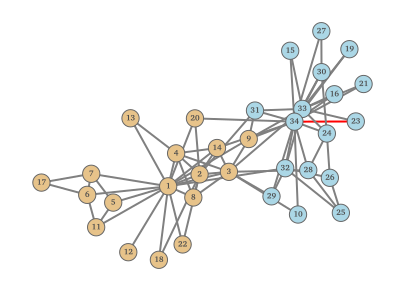

In [6]:
kcg = nx.karate_club_graph()
kcg_layout = nx.spring_layout(kcg,k=1.1, seed=2, iterations=200)
kcg_cmap={
    'Mr. Hi':my_orange,
    'Officer':my_blue,
}
kcg.add_nodes_from([(
    i,{
        "label": n+1,
        'pos': 5*kcg_layout[i],
        # 'node_options':{} 
    }
) for n,i in enumerate(kcg.nodes())])
kcg.add_edges_from(kcg.edges.keys(), color='gray')
kcg.add_edge(33,22,color='red')
# kcg.add_nodes_from([(
# kcg_layout = nx.nx_agraph.pygraphviz_layout(kcg, args=grphvz_kws)
#kcg_layout = nx.kamada_kawai_layout(kcg)
#kcg_layout = nx.arf_layout(kcg,pos=kcg_layout,a=1.8, seed=2, scaling=2)
# plt.figure(figsize=(6,4))
nx.draw_networkx(
    kcg,
    node_color=[np.array(kcg_cmap[i])/255 for i in node_attr_arr(kcg,'club')],
    pos=kcg_layout,
    labels=dict(zip(range(34), range(1,35))),
    edge_color=edge_attr_arr(kcg, 'color'),
    **nxdraw_kws
)
# nx.draw_networkx_edges(kcg, kcg_layout, edgelist={(33,22)}, edge_color='red')
ax = plt.gca()
ax.margins(0.05)
plt.axis('off')
plt.show()

In [7]:
# TexFragment(nx.to_latex_raw(kcg)).run_latex(tex_program='$QUARTO_PDFLATEX')
# run_tikz(kcg)

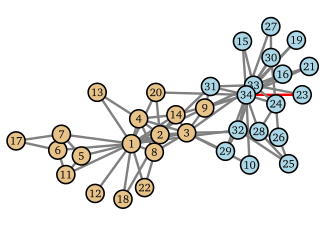

In [8]:
#| label: fig-karate-club
#| fig-cap: Zachary's Karate Club, with ambiguously extant edge 78 highlighted.

plot(
    kcg, 'kcg.tex',  
    layout=kcg_layout,
    # layout='FR',
    node_label=dict(zip(range(34), range(1,35))),
    node_color=[kcg_cmap[c] for c in node_attr_arr(kcg,'club')],
    edge_color=edge_attr_arr(kcg, 'color'),
    # seed=23,
    **tikz_kws
)

with open('kcg.tex') as f: 
    # print(f.read())
    fig =TexFragment(
        f.read(),
        **tex_kws
    ).run_latex(tex_program=tex)
fig

In [9]:
base_data = pd.read_csv('resources/vertices_.csv', index_col=0)

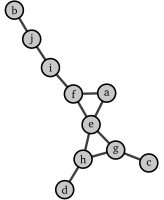

In [10]:
#| label: fig-colleague
#| fig-cap: graph of mutual collaboration relationships i.e. the "ground truth" social network

base_network = r"""
\begin{tikzpicture}[scale=1.1]
    \Vertices[size=0.4, RGB]{resources/vertices_.csv}
    \Edges{resources/edges.csv}
\end{tikzpicture}
"""

fig_colleague = TexFragment(
    base_network,
    **tex_kws
).run_latex(tex_program=tex)
fig_colleague

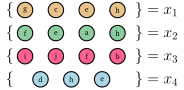

In [11]:
#| label: fig-obs-set
with open('obs-set.tex') as f: 
    # print(f.read())
    fig =TexFragment(
        f.read(),
        
        **(tex_kws|dict(scale=1.1)),
    ).run_latex(tex_program=tex)
fig

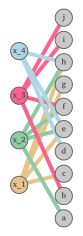

In [12]:
# Bipartite representation of node "activation" data
B = nx.Graph()

x1s = 'gceh'
x2s = 'feah'
x3s = 'ijfb'
x4s = 'dhe'
# Add nodes with the node attribute "bipartite"

B.add_nodes_from([
    ('x_1',{'color':my_orange, 'pos':(0,-1.5), 'bipartite':0}), 
    ('x_2',{'color':my_green, 'pos':(0,-0.5), 'bipartite':0}),
    ('x_3',{'color':my_red, 'pos':(0,0.5), 'bipartite':0}),
    ('x_4',{'color':my_blue, 'pos':(0,1.5), 'bipartite':0})
], bipartite=0)

B.add_nodes_from([(a, {'bipartite':1, 'color':my_grey,'pos':(1,0.5*(i-4.5))}) for i,a in enumerate('abcdefghij')])

# Add edges only between nodes of opposite node sets

B.add_edges_from(
    [('x_1',n, dict(color=my_orange)) for n in x1s] +\
    [('x_2',n, dict(color=my_green)) for n in x2s] +\
    [('x_3',n, dict(color=my_red)) for n in x3s] +\
    [('x_4',n, dict(color=my_blue)) for n in x4s]
)

# bp_pos = nx.layout.bipartite_layout(B, ['x1', 'x2', 'x3'], aspect_ratio=0.1)
plt.figure(figsize=(3,4))
nx.draw_networkx(
    B, pos=node_attr_map(B,'pos'),
    node_color = [np.array(i)/255 for i in node_attr_arr(B,'color')],
    edge_color = [np.array(i)/255 for i in edge_attr_arr(B, 'color')],
    **(nxdraw_kws|{'width':4.})
)
# nx.draw_networkx_edges(B, pos=node_attr_map(B, 'pos'))
ax = plt.gca()
ax.set_aspect('equal')
ax.margins(x=0.2,y=0)
# ax.set_clip_on('off')
plt.axis('off');


# plt.tight_layout()

In [13]:
#| label: fig-biadjacency-matrix
#| fig-cap: biadjacency matrix representation of node-occurrences, or equivalently, the incidence matrix between papers and authors.

biadj = nx.bipartite.biadjacency_matrix(
    B, ['x_1', 'x_2', 'x_3', 'x_4'], column_order='abcdefghij'
).todense().astype(int)

print(biadj_eq :="$$X(\\{1,2,3,4\\})="+np2tex(biadj, latexarraytype='pmatrix', fmt='{:d}')+"\n$$")
Latex(biadj_eq)

$$X(\{1,2,3,4\})=\begin{pmatrix}{}
  0  &  0  &  1  &  0  &  1  &  0  &  1  &  1  &  0  &  0 \\
  1  &  0  &  0  &  0  &  1  &  1  &  0  &  1  &  0  &  0 \\
  0  &  1  &  0  &  0  &  0  &  1  &  0  &  0  &  1  &  1 \\
  0  &  0  &  0  &  1  &  1  &  0  &  0  &  1  &  0  &  0 
\end{pmatrix}
$$


<IPython.core.display.Latex object>

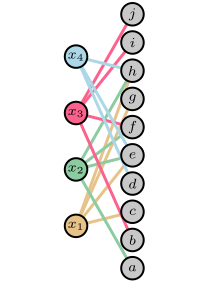

In [14]:
#| label: fig-bipartite
#| fig-cap: Bipartite representation of node "activation" data

plot(
    B, 'bp.tex',  
    layout=node_attr_map(B,'pos'),
    # layout='FR',
    node_label=list(B.nodes()),
    node_color=node_attr_arr(B,'color'),
    edge_color=edge_attr_arr(B, 'color'),
    node_math_mode=True,
    # seed=23,
    # **tikz_kws
    **(tikz_kws|dict(canvas=(figsize[0]/2, figsize[1])))
)

with open('bp.tex') as f: 
    # print(f.read())
    fig =TexFragment(
        f.read(),
        # **tex_kws
        **(tex_kws|dict(scale=2)),
    ).run_latex(tex_program=tex)
fig

/home/rtbs/code/thesis/dissertation/.pixi/envs/default/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


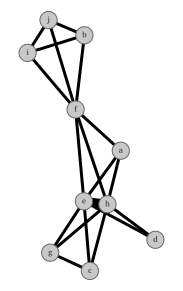

In [15]:
# Bproj = nx.bipartite.collaboration_weighted_projected_graph(B, 'ABCDEFGHIJ')
Bproj = nx.bipartite.weighted_projected_graph(B, 'abcdefghij')

Bproj.add_edges_from([(u,v,{'bend':-.40}) if {u,v} in [
    {'f','j'},{'f','b'},{'e','d'},{'h','c'}
] else (u,v,{'bend':0}) for u,v in list(Bproj.edges())] )
Bproj.edges['e','c']['bend'] = 0.4
collab_layout = kcg_layout = nx.spring_layout(Bproj,k=1.1, seed=4, iterations=200)

nx.draw_networkx(
    Bproj, 
    node_color=np.array(my_grey)/255,
    pos = collab_layout,
    # pos=node_attr_map(B,'pos'),
    # pos = {k:(x,y) for k,x,y in base_data[['x','y']].itertuples()},
    # connectionstyle='arc3,rad=0.4',
    arrows=True,
    **(nxdraw_kws|{'width':3*np.array(edge_attr_arr(Bproj, 'weight'))}),
)
ax = plt.gca()
ax.set_aspect('equal')
ax.margins(x=0.1,y=0.)
# ax.set_clip_on('off')
plt.axis('off');
# nx.draw_networkx_edges(

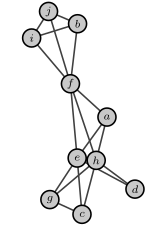

In [16]:
#| label: fig-collab
plot(
    Bproj, 'collab.tex',  
    # layout=node_attr_map(Bproj,'pos'),
    # layout={k:(y,x) for k,x,y in base_data[['x','y']].itertuples()},
    layout = collab_layout,
    node_label=list(Bproj.nodes()),
    node_color=node_attr_arr(Bproj,'color'),
    # edge_color=edge_attr_arr(B, 'color'),
    node_math_mode=True,
    # edge_curved=edge_attr_arr(Bproj, 'bend'),
    edge_width=[i for i in edge_attr_arr(Bproj,'weight')],
    # seed=23,
    
    # **tikz_kws
    **(tikz_kws|dict(canvas=(figsize[0]/2, figsize[1])))
)
with open('collab.tex') as f: 
    # print(f.read())
    fig_collab =TexFragment(
        f.read(),
        **tex_kws
        # **(tex_kws|dict(scale=2.1)),
    ).run_latex(tex_program=tex)
fig_collab

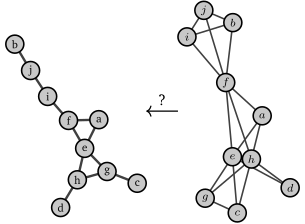

In [17]:
#| label: fig-recover
#| fig-cap: Recovering underlying dependency networks from node-cooccurrences.
# display(fig_colleague)
# display(Latex(r'$\Large\stackrel{?}{\leftarrow}$'))
# display(fig_collab)

base_net = r"""\end{scope}
\begin{scope}[local bounding box=scope2,shift={(scope1.base east)},xshift=-200 ]
    \Vertices[size=0.4, RGB]{resources/vertices_.csv}
    \Edges{resources/edges.csv}
\end{scope}
 \draw [thick,->,black] (scope1.west) -- (scope1.east -| scope2.east) node[midway,above] {?};
"""

with open('collab.tex') as f: 
    lines = f.readlines()
    # print(lines)
    lines.pop(1)
    lines.insert(1, '\\begin{scope}[local bounding box=scope1]\n')
    lines.insert(-1, base_net)
    # lines.insert(1, r'\clip (0,0) rectangle (15.0,13.5);')
    # print(r''.join(lines))
    fig = TexFragment(
        r''.join(lines),
        **tex_kws
        # **(tex_kws|dict(scale=2.1)),
    ).run_latex(tex_program=tex)
fig

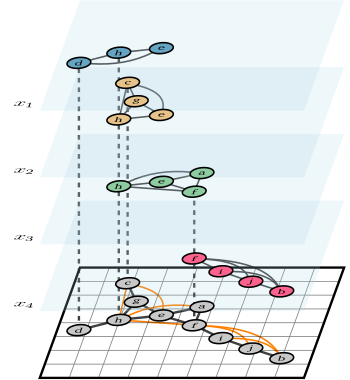

In [18]:
with open('stack-bow.tex') as f: 
    fig = TexFragment(
        f.read(),
        # implicit_tikzpicture=True,
        **tex_kws,
    ).run_latex(tex_program=tex)
fig